## Information Retrieval 2020 2C 1
### Enunciado

Tenemos un índice invertido con la siguiente estructura:

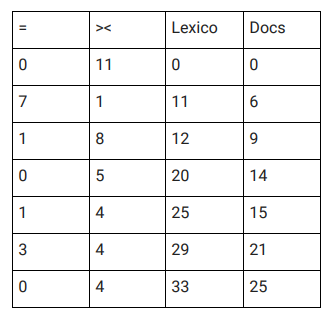

El siguiente archivo de léxico concatenado:

``` Amarillentooncestralaquelrbolustoazul ```

Y los siguientes punteros a documento concatenados, codificados con códigos gamma:

``` 010010011001001010010101010101 ```


### Ejercicio a
Resolver la consulta “aquel arbusto azul” indicando detalladamente cada paso. Informar la
cantidad de accesos a disco necesarios para la resolución de la misma.

### Ejercicio b
Para la consulta rankeada "aquel arbusto azul" determinar el TF.IDF de cada documento
resultado de la búsqueda e indicar cómo quedaría el orden de los documentos resultado de
la misma.


### Ejercicio a
Resolver la consulta “aquel arbusto azul” indicando detalladamente cada paso. Informar la
cantidad de accesos a disco necesarios para la resolución de la misma.

### Solución
Para resolver la consulta $Q = \text{aquel arbusto azul}$ se deben realizar primero las consultas $Q_1 = aquel$, $Q_2 = arbusto$ y $Q_3 = azul$

Al observar los índices, como se indican las columnas de igual y de distintos, se puede notar que se está utilizando _front coding_ (Además como cada 3 filas hay un 0 en la columna de iguales, se podría estar usando _front coding parcial_).

Para resolver la consulta $Q_1 = \text{aquel}$, se parte de realizar una busqueda binaria del término

|i|= |><| Lexico| Docs|
|---|---|---|---|---|
|0|0 |11| 0| 0|
|1|7 |1| 11| 6|
|2|1 |8| 12| 9|
|3|0 |5| 20| 14|
|4|1 |4| 25| 15|
|5|3 |4| 29| 21|
|6|0 |4| 33| 25|
Tabla 1.

Primero voy a la fila 3, el cal indica el índice en el léxito 20, con una longitud de 5 (0 + 5), sin compartir caracteres con los términos anteriores, se obtiene así:

``` 
amarillentooncestral aquel rbolustoazul
                    20....   
```
Realizando una lectura en disco, ya se obtuvo el término que se estaba buscando. Con lo cual para la consulta $Q_1 = \text{aquel}$ se recupera del índice de docs a partir del 14 (1 bit = 15 - 14)

```
01001001100100 1 010010101010101
              14 
```
Que corresponde al 1 codificado en gamma $\gamma(1) = 1$, es decir, el resultado de la consulta es el documento $D_1$

Para la consulta $Q_2 = arbusto$:
Se parte del medio (que ya fue leído), como 'arbusto' es lexicograficamente mayor a 'aquel', se debe buscar hacia adelante, yendo así al índice (i de la tabla 1) 5, que toma desde el índice del léxico 29 con una longitud de 4 (33 - 29)

``` 
amarillentooncestral aquel rbol usto azul
                    20....     29...     
```
Adicionando así una lectura de disco (hasta ahora 2), como este término tiene letras compartidas con el término anterior, se reconstruye recursivamente el término de la fila 4 (va del 25 al 26):

``` 
amarillentooncestral aquel rbol usto azul
                    20....25...29...     
```
Recuperando '.rbol', recordando que, este a su vez, comparte un caracter con el anterior (que este se encuentra en memoria 'aquel') completando así 'arbol'. Ahora, el término que nos interesa comparte los primeros tres caracteres con 'arbol', es decir, recuperamos 'arbusto' (que además es el término que buscamos). Ahora, buscando los documentos, tenemos el rango [21, 25)

```
01001001100100 1 010010 1010 10101
              14       21...
```

Se recupera ```1010```, que en gamma se separaría ```1 010``` obteniendo así los documentos $D_1$ y $D_3$ ($\gamma(1) = 1$ y $\gamma(2) = 010$).

Finalmente, para el último query  $Q_3 = azul$ que es lexicograficamente mayor a 'arbusto'  y a 'aquel', se procede a buscar hacia adelanta después de 'arbusto' yendo al índice (de la tabla 1) 6. Teniendo que leer así desde el índice 33 (del léxico) cuatro caracteres (que no son compartidos con los términos anteriores), adicionando una lectura de disco (4 lecturas hasta ahora).

``` 
amarillentooncestral aquel rbol usto azul
                    20....25...29...33...    
```

Recuperando así el término 'azul', que es el término buscado. Este registro (fila de la tabla), tiene asociado en el índice de documentos, desde el bit 25, hasta el final.

```
01001001100100 1 010010 1010 10101
              14       21...25....
```

Se recupera ```10101```, que en gamma se separaría ```1 010 1``` obteniendo así los documentos $D_1$, $D_3$ y $D_4$ ($\gamma(1) = 1$ y $\gamma(2) = 010$).

El resultado de la consulta $Q$, será la unión de las consultas individuales.

$ \left\{ D_1, D_3, D_4 \right \}$

Siendo el $D_1$ aquel que contiene los tres términos.

Lecturas totales de disco: 4 + 3 = 7 (los 3, son las lecturas en el índice de documentos)



### Ejercicio b
Para la consulta rankeada "aquel arbusto azul" determinar el TF.IDF de cada documento
resultado de la búsqueda e indicar cómo quedaría el orden de los documentos resultado de
la misma.


Las frecuencias de las palabras de la consulta, en los documentos recuperados son (se asume que solo aparece una vez):

||$D_1$|$D_2$|$D_3$|$D_4$|
|--|--|--|--|--|
|aquel|1|0|0|0|
|arbusto|1|0|1|0|
|azul|1|0|1|1|

En base a esto se 

Codificando rápidamente, los punteros concatenados, se obtienen: |2, 2|, |3|, |4|, |1|, |2, 2|, |1, 2|, |1, 2, 1|, como se ve en el último, hay repetidos y no es monotono, con lo cual se está usando un índice por diferencias (esto sirvió para corregir un error en el punto a, que lo había hecho mal en un principio).

Se puede notar que la cantidad máxima de documentos que se puede formar son 4, entonces, $N = 4$

Para calcular IDF:


$$ IDF(t_i) = \log \left( \frac{N + 1}{f_{t_i}}\right) $$

Que en este caso 

$ IDF(\text{aquel}) = \log \left( \frac{4 + 1}{1}\right) = 0.699 $


$ IDF(\text{arbusto}) = \log \left( \frac{4 + 1}{2}\right) = 0.398 $


$ IDF(\text{azul}) = \log \left( \frac{4 + 1}{3}\right) = 0.222 $

Luego, usando TF:

$$ TF_{ij} = \frac{(k + 1)  ft_{ij}}{ft_{ij} + k} $$

Con $k = 2$.

||$D_1$|$D_2$|$D_3$|$D_4$|IDF|TF_D_1|TF_D_2|TF_D_3|TF_D_4|
|--|--|--|--|--|--|--|--|--|--|
|aquel|1|0|0|0|0.699|3/3|0|0|0|
|arbusto|1|0|1|0|0.398|3/3|0|3/3|0|
|azul|1|0|1|1|0.222|3/3|0|3/3|3/3|

Ahora para rankear cada documento se hace:

$$ R(Q, D_j) = \sum_{t_i \in Q \\ t_i \in D_j} TF_{ij} * IDF(t_i)$$

Que para el documento $D_2$ ya se puede predecir que va a valer cero.

$R(Q, D_1) = .699+.398+.222=1.319$

$R(Q, D_3) = .398+.222=.620$

$R(Q, D_4) = .222=.222$

Quedando así, el orden:
1. $D_1$
1. $D_3$
1. $D_4$

amarillento, 2, 4

amarillo, 3

ancestral, 4

aquel, 1

arbol, 2, 4

arbusto, 1, 3

azul, 1, 3, 4


|2, 2|, |3|, |4|, |1|, |2, 2|, |1, 2|, |1, 2, 1|